# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
 !pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

You should consider upgrading via the 'e:\программы для учебы\python 3.8.1\python.exe -m pip install --upgrade pip' command.


In [2]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [3]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("E:\\Education\\7bits\\courses\\MLandDS\\ml-solutions\\ml_course\\data\\StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


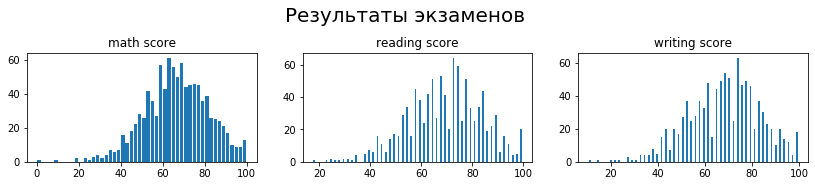

In [4]:
fig, axes = plt.subplots(1, 3)

axes[0].hist(df['math score'], bins = 50, rwidth = 0.8)
axes[1].hist(df['reading score'], bins = 50, rwidth = 0.4)
axes[2].hist(df['writing score'], bins = 50, rwidth = 0.4)

#  Заголовок области Figure:
fig.suptitle('Результаты экзаменов',
             y = 1.2,
             fontsize = 20)
    
#  Заголовки областей Axes:
axes[0].set_title('math score')
axes[1].set_title('reading score')
axes[2].set_title('writing score')

fig.set_figheight(2)
fig.set_figwidth(14)

plt.show()

In [5]:
variables = ['math score','reading score','writing score']
for col in variables:
    print(col, df[col].median())

math score 66.0
reading score 70.0
writing score 69.0


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Ответ: В датафрейме есть следующие уровни образования в столбце *'parental level of education':
some college, associate's degree, high school, some high, school, bachelor's degree, master's degree.
Колличественное распределение выведено ниже.

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.

Ответ: Да. Отличаются. У людей, чьи родители имеют высокое образование, набирают более высокие баллы.

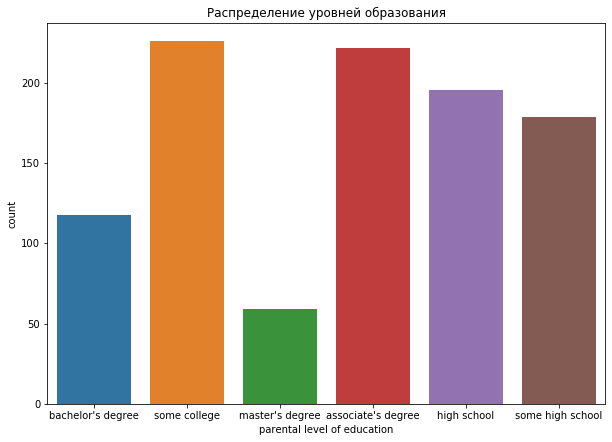

In [26]:
plt.figure(figsize=[10, 7])
plt.title('Распределение уровней образования')
sns.countplot(data = df, x='parental level of education')

In [19]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

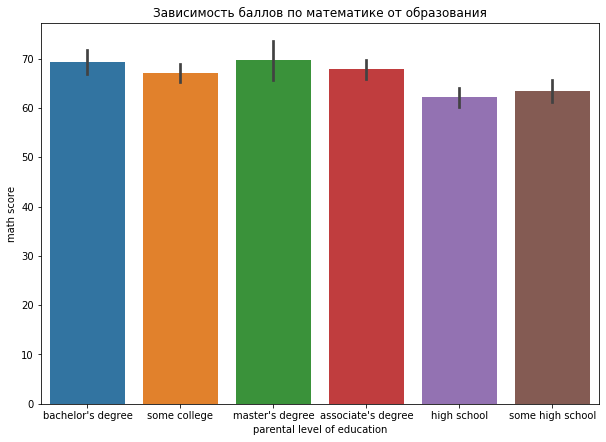

In [25]:
plt.figure(figsize=[10, 7])
plt.title('Зависимость баллов по математике от образования')
sns.barplot(data = df, y='math score', x='parental level of education')

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [16]:
len(df.loc[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']> 90)])

17

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

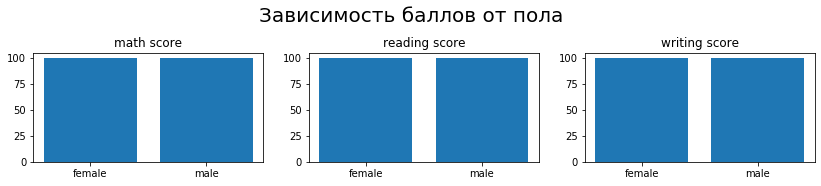

In [32]:
fig, axes = plt.subplots(1, 3)

axes[0].bar(data=df, height = 'math score', x = 'gender')
axes[1].bar(data=df, height = 'reading score', x = 'gender')
axes[2].bar(data=df, height = 'writing score', x = 'gender')

#  Заголовок области Figure:
fig.suptitle('Зависимость баллов от пола',
             y = 1.2,
             fontsize = 20)
    
#  Заголовки областей Axes:
axes[0].set_title('math score')
axes[1].set_title('reading score')
axes[2].set_title('writing score')

fig.set_figheight(2)
fig.set_figwidth(14)

plt.show()

In [63]:
df.groupby('gender').agg(['min', 'max', 'median'])

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100     65            17  100     73            10  100   
male           27  100     69            23  100     66            15  100   

               
       median  
gender         
female     74  
male       64

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())
Ответ: Да влияют. Из таблиц видно, что наличие обеда и подготовки к тесту повышает среднее значение по всем предметам.

In [67]:
df[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg(['mean'])

math score writing score reading score
                          mean          mean          mean
lunch        gender                                       
free/reduced female  55.814815     66.444444     67.386243
             male    62.457831     59.126506     61.542169
standard     female  68.124620     75.927052     75.607903
             male    72.022152     65.509494     67.537975

In [68]:
df[['test preparation course','gender','math score','writing score','reading score']].groupby(['test preparation course','gender']).agg(['mean'])

math score writing score reading score
                                     mean          mean          mean
test preparation course gender                                       
completed               female  67.195652     78.793478     77.375000
                        male    72.339080     69.793103     70.212644
none                    female  61.670659     68.982036     69.982036
                        male    66.688312     59.649351     62.795455

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

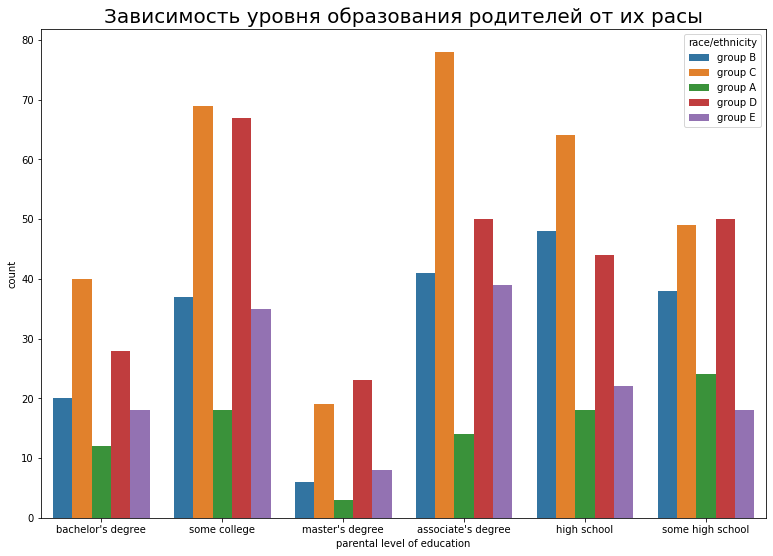

In [74]:
plt.figure(figsize=[13, 9])
plt.title('Зависимость уровня образования родителей от их расы', fontsize = 20)
sns.countplot(x='parental level of education', data=df, hue='race/ethnicity') 

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

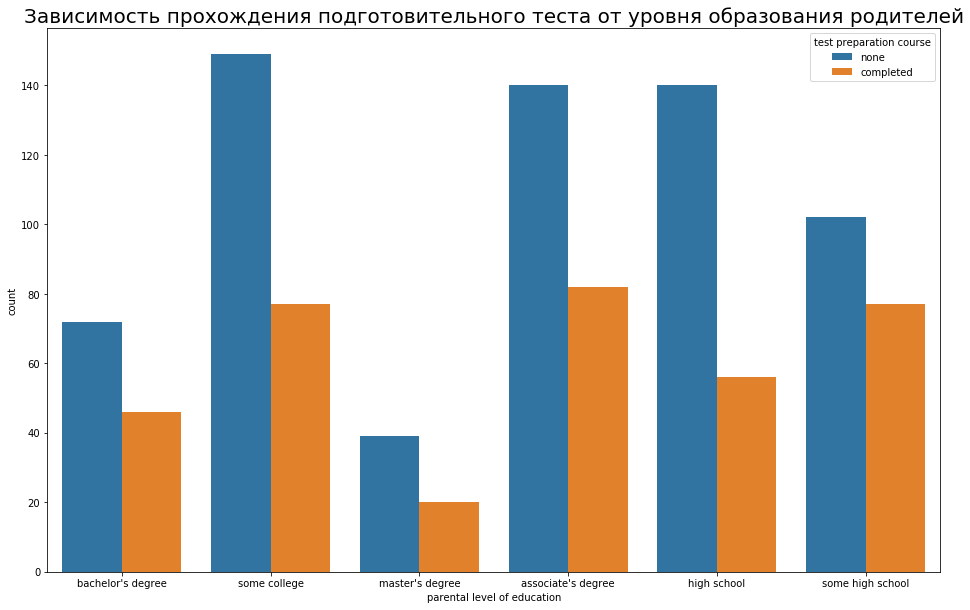

In [77]:
plt.figure(figsize=[16, 10])
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей', fontsize = 20)
sns.countplot(x='parental level of education', data=df, hue='test preparation course') 

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

In [83]:
df[(df['math score'] >= 40)].shape[0]

960

In [84]:
len(df)

1000

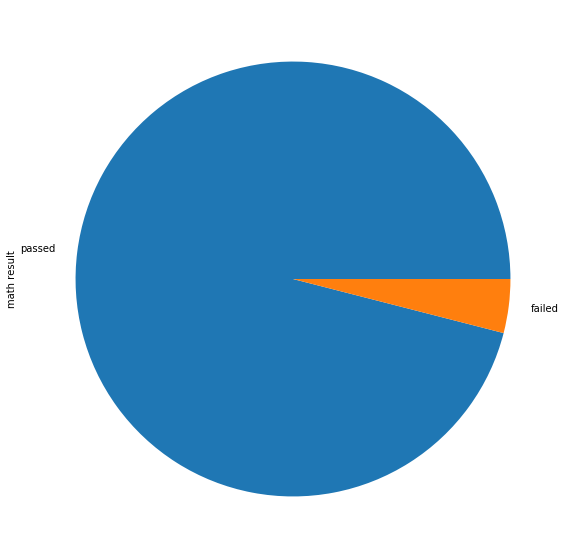

In [90]:
variables = ['math score','reading score','writing score']
for var in variables:
    name = var.split()[0] + ' result'
    df[name] =  df[var].apply(lambda x: 'passed' if x >= 40 else 'failed')

plt.figure(figsize=[10, 10])
df['math result'].value_counts().plot.pie()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

In [91]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math result,reading result,writing result
0,female,group B,bachelor's degree,standard,none,72,72,74,passed,passed,passed
1,female,group C,some college,standard,completed,69,90,88,passed,passed,passed
2,female,group B,master's degree,standard,none,90,95,93,passed,passed,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44,passed,passed,passed
4,male,group C,some college,standard,none,76,78,75,passed,passed,passed
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,passed,passed,passed
996,male,group C,high school,free/reduced,none,62,55,55,passed,passed,passed
997,female,group C,high school,free/reduced,completed,59,71,65,passed,passed,passed
998,female,group D,some college,standard,completed,68,78,77,passed,passed,passed


In [119]:
df['status'] = df.apply(lambda x : 'failed' if x['math result'] == 'failed' or 
                           x['reading result'] == 'failed' or x['writing result'] == 'failed'
                           else 'passed', axis = 1)

variables = ['math score','reading score','writing score']

df['avg'] = (df['math score'] + df ['reading score'] + df['writing score']) / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math result,reading result,writing result,status,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,passed,passed,passed,passed,72.666667
1,female,group C,some college,standard,completed,69,90,88,passed,passed,passed,passed,82.333333
2,female,group B,master's degree,standard,none,90,95,93,passed,passed,passed,passed,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,passed,passed,passed,passed,49.333333
4,male,group C,some college,standard,none,76,78,75,passed,passed,passed,passed,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,passed,passed,passed,passed,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,passed,passed,passed,passed,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,passed,passed,passed,passed,65.000000
998,female,group D,some college,standard,completed,68,78,77,passed,passed,passed,passed,74.333333


In [126]:
def getMark(avgmark, status):
  if status == 'failed':
    return 'E'
  if(avgmark >= 90 and avgmark <= 100):
    return 'O'
  if(avgmark >= 80 and avgmark < 90):
    return 'A'
  if(avgmark >= 70 and avgmark < 80):
    return 'B'
  if(avgmark >= 60 and avgmark < 70):
    return 'C'
  if(avgmark >= 41 and avgmark < 60):
    return 'D'
  else :
    return 'E'

df['mark'] = df.apply(lambda x: getMark(x['avg'], x['status']), axis = 1)

In [127]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math result,reading result,writing result,status,avg,mark
0,female,group B,bachelor's degree,standard,none,72,72,74,passed,passed,passed,passed,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,passed,passed,passed,passed,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,passed,passed,passed,passed,92.666667,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,passed,passed,passed,passed,49.333333,D
4,male,group C,some college,standard,none,76,78,75,passed,passed,passed,passed,76.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,passed,passed,passed,passed,94.000000,O
996,male,group C,high school,free/reduced,none,62,55,55,passed,passed,passed,passed,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,passed,passed,passed,passed,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,passed,passed,passed,passed,74.333333,B


In [128]:
df['mark'].value_counts()

B    261
C    256
D    234
A    146
O     52
E     51
Name: mark, dtype: int64

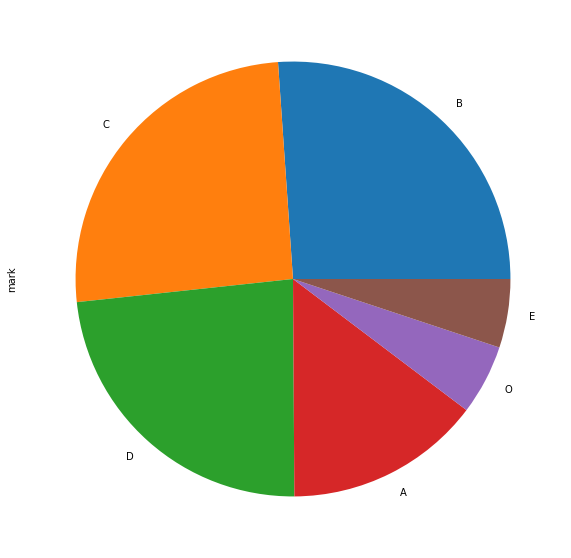

In [130]:
plt.figure(figsize=[10, 10])
df['mark'].value_counts().plot.pie()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В
Ответ: Студенты женского пола получили больше оценок О, А, В.

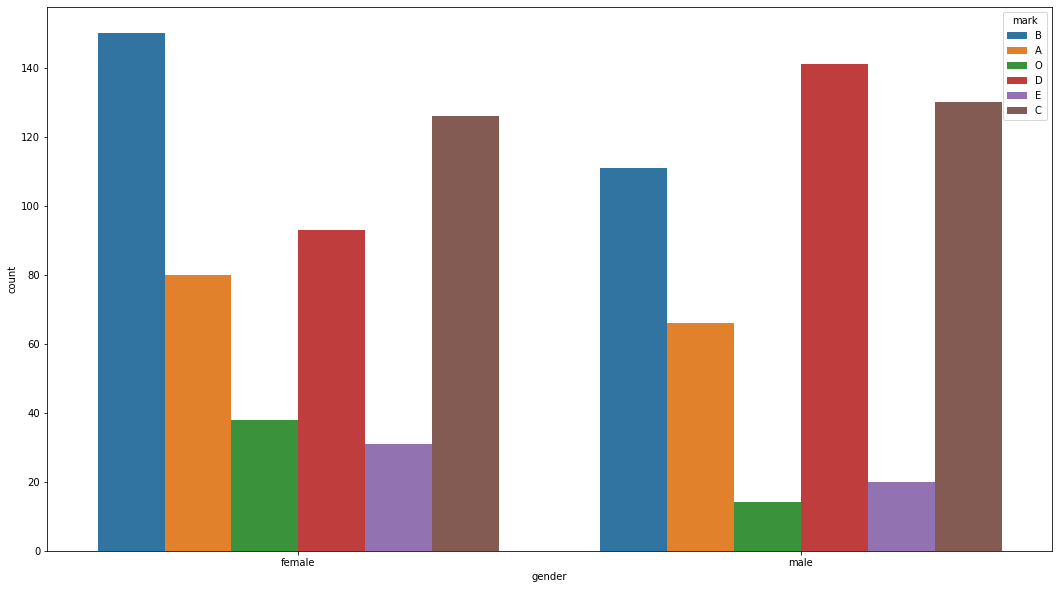

In [132]:
plt.figure(figsize=[18, 10])
sns.countplot(x = 'gender', hue = 'mark', data = df)